In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step(x):
    if x > 0:
        return 1
    else:
        return 0

In [3]:
print(step(1))

1


In [4]:
x = np.arange(-5, 5, 0.1)

In [5]:
def step2(x):
    return np.array(x > 0, dtype=int)

In [6]:
y = step2(x)

# 71p step function

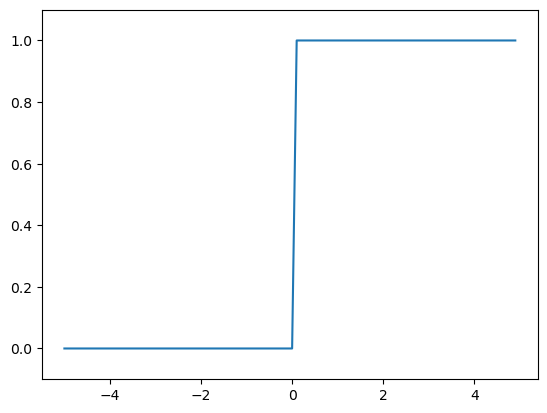

In [7]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
c = np.array([-1, 1, 2])
sigmoid(c)

array([0.26894142, 0.73105858, 0.88079708])

* 73p sigmoid

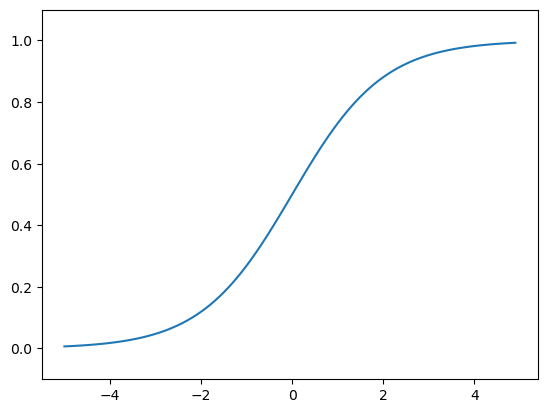

In [10]:
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [11]:
a = np.array([[1,2],[3,4]])
a.shape

(2, 2)

In [12]:
b = np.array([[5,6],[7,8]])
b.shape

(2, 2)

In [13]:
np.dot(a,b)

array([[19, 22],
       [43, 50]])

In [14]:
np.dot(b,a)

array([[23, 34],
       [31, 46]])

In [15]:
o = np.array([1,2,3])
o.shape

(3,)

In [16]:
ro = o.reshape((3,1))
ro.shape
print(ro)

[[1]
 [2]
 [3]]


* 85p - 87p 3층 신경망 구현

1차원 열 배열 쓰는게 Cousera에서 하던 방식이랑 달라서 매우 거슬림; 

    -> x 행렬의 shape가 (1, 이전 층 노드의 개수)

가중치 배열의 경우 $w_{11}$ 의 앞 1이 가중치 층이고, 뒤 1이 이전 층임

가중치 행렬의 경우 shape가 (이전 층 * 현재 층) 의 모양을 하고 있음

편향의 shape는 마찬가지로 (1, 현재 층 노드의 개수)

In [17]:
# x.shape -> 1 2
# w1.shape -> 2 3
# b1.shape -> 1 3
# np.dot(x, W1) + b1 -> a1 (1, 3)
# z1 = sigmoid(a1)

In [18]:
# z1.shape 1 3
# w2.shape 3 2
# b2.shape 1 2
# np.dot(z1, W2) + b2 -> a2 (1, 2)
# z2 = sigmoid(a2)

In [19]:
# z2.shape -> 1 2
# w3.shape -> 2 2
# b3.shape -> 2 2
# a3.shape -> 2 2
# np.dot(z2, W3) + b3 -> a3 (1, 2)
# y = id_func(a3)

92 softmax

소프트맥스 함수를 이용함으로써 문제를 확률적 （통계적）으로 대응할 수 있게 된다.

In [20]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

# 문제점, [a]의 값이 너무 크면 오버플로를 발생시킨다.
# exp(a)를 계산할 때, [a]의 최댓값을 빼서 오버플로를 방지한다.

In [21]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

* 97 MNIST

In [22]:
import sys, os

sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정

from dataset.mnist import load_mnist

# 처음 한 번은 몇 분 정도 걸립니다.
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

# (60000, 784)
# (60000,)
# (10000, 784)
# (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [23]:
%matplotlib inline

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [24]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [25]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("accuracy:" + str(float(accuracy_cnt) / len(x)))

accuracy:0.9352


In [26]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

x.shape # test data

(10000, 784)

In [27]:
# 28 X 28 이미지
x[0].shape

(784,)

In [28]:
print(W1.shape)
print(W2.shape)
print(W3.shape)

(784, 50)
(50, 100)
(100, 10)


103 Batch

In [29]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

# np.dot은 파이썬 기본 배열도 곱할 수 있다.
# 내부적으로 numpy 배열로 변환되는 과정을 거친다.
for i in range(0, len(x), batch_size):
    x_batch = x[i: i + batch_size]
    y_batch = predict(network, x_batch)
    # np.argmax(..., axis=1) -> 각 행에 대해 가장 큰 열의 인덱스 반환
    # np.argmax(..., axis=0) -> 각 열에 대해 가장 큰 행의 인덱스 반환
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("accuracy:" + str(float(accuracy_cnt) / len(x)))

accuracy:0.9352


In [30]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -1 * np.sum(t * np.log(y + delta))

In [31]:
# 정답 레이블의 출력이 높은 경우 -> 작은 CEE
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [32]:
# 정답 레이블의 출력이 낮은 경우 -> 큰 CEE
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [33]:
def f_1(x):
    return 0.01*(x**2)+0.1*x

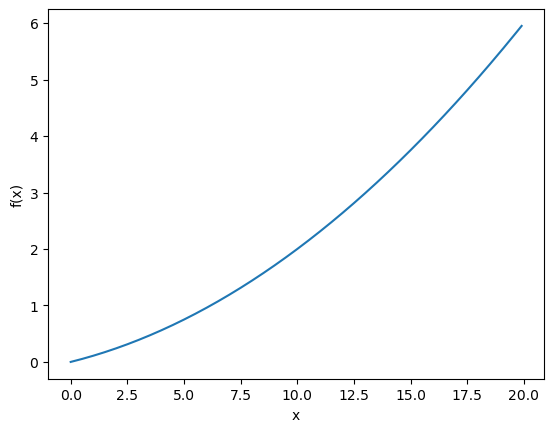

In [34]:
x = np.arange(0.0, 20.0, 0.1)
y = f_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [35]:
def ndiff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [36]:
ndiff(f_1, 5)

0.1999999999990898

125 편미분

$f(x_0, x_1) = x^{2}_{0} + x^{2}_{1}$

In [37]:
def f2(x): # x -> ndarray
    return x[0]**2 + x[1]**2 # np.sum(x**2)

In [38]:
# x0 = 3, x1 = 4일 때, x0에 대한 편미분 구하라.
def t0(x0):
    return x0**2 + 4.0**2.0

# x0 = 3, x1 = 4일 때, x1에 대한 편미분 구하라.
def t1(x1):
    return 3**2 + x1**2.0

In [39]:
print(ndiff(t0, 3.0))
print(ndiff(t1, 4.0))

6.00000000000378
7.999999999999119


127 기울기 
### numerical gradient

In [40]:
def grad(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    # x: [3, 4]
    # grad: [0, 0]
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h # f(x_idx + h)
        fxh1 = f(x)

        x[idx] = tmp_val - h # f(x_idx + h - h)
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h) # 그 식
        x[idx] = tmp_val # x[idx] 원상 복귀
    
    return grad

In [41]:
grad(f2, np.array([3.0, 4.0]))

array([6., 8.])

129 경사 하강법

In [42]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        g = grad(f, x)
        x -= lr * g
    return x

문제 : 경사 하강법으로 $f(x_0, x_1) = x^2_0 + x^2_1$의 최솟값을 구하라.

In [43]:
import inspect
source = inspect.getsource(f2)
print(source)

def f2(x): # x -> ndarray
    return x[0]**2 + x[1]**2 # np.sum(x**2)



In [44]:
init_x = np.array([-3.0, 4.0])
gradient_descent(f2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

133 신경망 학습

In [45]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [46]:
net = simpleNet()
print(net.W)

[[-1.79611039  2.90549485  0.26411409]
 [-0.48599352 -1.92453551 -0.66606892]]


In [47]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.5150604   0.01121495 -0.44099358]


In [48]:
print(np.argmax(p))
t = np.array([0, 0, 1])
print(net.loss(x, t))

1
1.069319142099153


In [49]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.07035424  0.32370042 -0.39405466]
 [ 0.10553137  0.48555063 -0.59108199]]


#### 136 학습 알고리즘 구현

In [50]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

In [51]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z2, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, y, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [52]:
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size) # 
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.numerical_gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= lr * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.0607, 0.0594


KeyboardInterrupt: 

#### 160 단순한 계층 구현

In [55]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

In [56]:
apple = 100
num = 2
tax = 1.1

apple_Layer = MulLayer()
tax_Layer = MulLayer()

apple_price = apple_Layer.forward(apple, num)
price = tax_Layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [58]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

In [62]:
x = np.array([[1.0, -0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [63]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


In [7]:
class sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self):
        out = 1 / (1 + exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

In [8]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x * self.w) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

In [9]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실
        self.y = None # softmax의 출력
        self.x = None # 정답 레이블 (원핫 벡터)

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx

#### 181 오차역전파법을 적용한 신경망 구현하기

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np